In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('iris.data.txt', header = None)
data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Label']
print(data.shape)
print(data.head())

(150, 5)
   Sepal Length  Sepal Width  Petal Length  Petal Width        Label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
X = data[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
print(X.shape)
y = data[['Label']]
print(y.shape)

(150, 4)
(150, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [5]:
from sklearn.svm import SVC

model_1 = SVC(C = 1, kernel = 'linear', gamma = 'auto')
model_1.fit(X_train, np.squeeze(y_train))

#print(model_1.score(X_train, np.squeeze(y_train)))

SVC(C=1, gamma='auto', kernel='linear')

In [6]:
y_predict_1 = model_1.predict(X_test)

print("SVM with C = 1 Accuracy: ", model_1.score(X_test, np.squeeze(y_test)))

SVM with C = 1 Accuracy:  1.0


In [7]:
model_2 = SVC(C = 100, kernel = 'linear', gamma = 'auto')
model_2.fit(X_train, np.squeeze(y_train))

y_predict_2 = model_2.predict(X_test)

print("SVM with C = 100 Accuracy: ", model_2.score(X_test, np.squeeze(y_test)))

SVM with C = 100 Accuracy:  1.0


**Plotting Classification Model for C=1 & C=100 (using first 2 features only)**

In [9]:
X = data[['Sepal Length', 'Sepal Width']]
print(X.shape)
y = data[['Label']]
print(y.shape)

(150, 2)
(150, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
model_1 = SVC(C = 1, kernel = 'linear', gamma = 'auto')
model_1.fit(X_train, np.squeeze(y_train))

y_predict_1 = model_1.predict(X_test)

print("SVM with C = 1 Accuracy: ", model_1.score(X_test, np.squeeze(y_test)))

SVM with C = 1 Accuracy:  0.8333333333333334


In [12]:
model_2 = SVC(C = 100, kernel = 'linear', gamma = 'auto')
model_2.fit(X_train, np.squeeze(y_train))

y_predict_2 = model_2.predict(X_test)

print("SVM with C = 100 Accuracy: ", model_2.score(X_test, np.squeeze(y_test)))

SVM with C = 100 Accuracy:  0.8


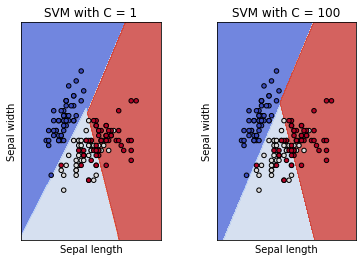

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
models = (
    SVC(C = 1.0, kernel = 'linear', gamma = 'auto'),
    SVC(C = 100, kernel = 'linear', gamma = 'auto'),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVM with C = 1",
    "SVM with C = 100",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()